# 这个文件用于数据处理

## 1. 准备

## 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
import GEOparse
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, accuracy_score, roc_auc_score
warnings.filterwarnings('ignore')

In [2]:
# 训练使用的数据集
GSE_Train = "GSE63990"

In [3]:
gse = GEOparse.get_GEO(geo=GSE_Train, destdir="./", silent=True)
GPL571 = gse.gpls['GPL571'] # 准备对照表，准备把ID转换为基因名

In [4]:
gse_csv = pd.read_csv('./datasets/' + GSE_Train + '.csv')
gse_csv.head() # 预览数据

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
0,non-infectious illness,107.026284,158.817338,2545.754898,186.244424,13.132469,643.402073,34.615676,17.490946,2929.019555,...,17.173226,422.464901,566.805882,481.918815,1421.477295,1302.020303,6250.362334,3836.600257,17740.725022,14961.589573
1,non-infectious illness,221.020421,124.644738,2143.929143,324.223899,15.427804,1001.622909,49.833883,22.848206,5667.531661,...,17.962223,652.117965,800.852865,822.133404,2305.851262,2008.050881,8731.397156,5399.129367,19067.890695,17285.989865
2,non-infectious illness,137.091142,115.353642,1741.194207,299.526479,13.588461,549.283988,47.869510,18.544460,3186.032084,...,17.282754,483.392556,566.237470,586.430031,1792.943487,1330.467773,7401.441597,4578.962962,18303.281696,15753.041045
3,non-infectious illness,126.175162,98.119250,1316.526914,326.999326,12.738011,339.984798,51.808930,19.624606,5535.493091,...,17.651712,1275.694498,1781.291882,1547.788940,3845.464156,3549.057271,11770.475723,7924.052042,23370.081259,19856.779557
4,bacterial,105.348086,260.359324,2930.300695,223.766173,12.436344,409.723526,35.071703,19.844859,581.984161,...,18.275624,404.702873,518.880900,477.676689,1299.615932,1186.047735,5968.686731,3780.851630,18440.196387,15535.017110


In [5]:
gse_csv.isnull().sum() # 看一下有没有缺失的项，看起来没有缺失

infection_status        0
1007_s_at               0
1053_at                 0
117_at                  0
121_at                  0
                       ..
AFFX-r2-Ec-bioC-5_at    0
AFFX-r2-Ec-bioD-3_at    0
AFFX-r2-Ec-bioD-5_at    0
AFFX-r2-P1-cre-3_at     0
AFFX-r2-P1-cre-5_at     0
Length: 22278, dtype: int64

In [6]:
gse_csv.info() # 看一下基础信息，多少行多少列什么的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 22278 entries, infection_status to AFFX-r2-P1-cre-5_at
dtypes: float64(22277), object(1)
memory usage: 47.6+ MB


In [7]:
gse_csv.describe() # 数据的统计特征

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,165.631442,130.740009,2236.350260,364.108250,13.540978,652.112480,47.259380,19.895041,3448.988024,15.372574,...,17.960648,607.332519,901.026826,873.938972,2564.283287,2032.087547,9049.325373,6003.580410,20711.782902,19113.436652
std,54.399462,30.855880,1020.289472,161.458720,1.858646,319.702021,12.298700,2.461557,2033.044366,1.606974,...,3.415685,393.785474,576.839561,553.130006,1274.000237,1117.079105,3065.586454,2332.105641,3456.412319,4035.397323
min,70.815033,62.482569,547.160196,137.763769,10.141081,179.769213,24.427230,14.596370,441.064964,12.114427,...,12.250326,117.046078,88.813649,96.682388,324.500125,270.356249,1310.217547,1007.410165,6940.705932,5257.953071
25%,118.610693,109.106194,1492.036620,228.333765,12.130430,409.437572,36.638510,18.502875,1980.405569,14.305639,...,15.318730,413.743277,558.739753,513.103755,1539.169334,1348.175630,7149.787801,4643.006957,18877.231664,16279.937228
50%,161.824602,126.165278,1989.193107,299.788834,13.249392,581.879854,45.509423,19.499449,3166.629426,15.193815,...,17.550049,564.782753,870.563359,864.796010,2730.474414,2006.213733,9544.845048,6201.995455,21361.827523,20467.394154
75%,208.826220,149.591965,2813.684010,485.465435,14.585919,809.303849,56.137788,20.937420,4471.564211,16.105127,...,19.572283,677.932522,1050.809938,1047.814521,3262.325534,2389.964247,10799.861528,7037.540798,22745.706969,21934.027237
max,300.442602,276.673083,7086.883002,837.532837,22.848622,2092.180445,85.370946,34.411306,14617.385297,23.960545,...,33.334236,4358.241783,5679.057997,5594.920631,10191.097456,10355.920179,22907.286456,18998.651749,31532.037173,29547.050259


In [8]:
# show the values of the column 'infection_status'
gse_csv['infection_status'].value_counts() # 看一下感染这个列的分布

viral                     117
non-infectious illness     90
bacterial                  73
Name: infection_status, dtype: int64

In [9]:
# drop if the value of the column 'infection_status' is 'non-infectious illness'
# And map the values of the column 'infection_status' to 0 and 1
# 0: viral
# 1: bacterial
gse_csv = gse_csv[gse_csv['infection_status'] != 'non-infectious illness'] # 去掉非感染的
gse_csv['infection_status'] = gse_csv['infection_status'].map({'viral': 0, 'bacterial': 1}) # 感染的映射为0和1
gse_csv.head()

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
4,1,105.348086,260.359324,2930.300695,223.766173,12.436344,409.723526,35.071703,19.844859,581.984161,...,18.275624,404.702873,518.880900,477.676689,1299.615932,1186.047735,5968.686731,3780.851630,18440.196387,15535.017110
8,1,117.966262,155.368821,3960.321313,232.937710,12.291060,268.529399,35.330680,18.836610,1183.990090,...,15.854200,325.053728,414.681571,404.296541,1238.917847,925.536531,4853.316801,3129.657248,16779.113562,13370.420699
9,1,76.522752,165.680666,1863.592572,195.818225,13.239240,407.588152,31.311397,17.179513,441.064964,...,21.644487,518.351118,682.958155,596.438491,1571.250251,1352.416530,6453.361642,4420.693328,18730.826505,16239.062657
10,0,151.713626,134.508139,2961.309570,310.684993,12.671413,1195.405864,45.287427,20.290190,2279.719391,...,19.650091,685.866447,911.759827,856.025174,2192.510961,1766.428403,8917.114767,5785.890802,21350.423108,18791.209387
11,1,130.138280,123.890112,3002.134546,209.012419,12.767025,372.252524,30.599587,20.360229,2647.300497,...,14.283159,236.513759,256.170997,270.814859,776.857302,678.987893,3480.450617,2149.140013,12332.596366,10308.117308


In [10]:
# type of the column 'infection_status' should be boolean
gse_csv['infection_status'] = gse_csv['infection_status'].astype('bool') # 把感染的列转换为bool类型，进一步方便后面的处理

In [11]:
gse_csv.head() # 预览一下预处理后的数据

,infection_status,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
4,True,105.348086,260.359324,2930.300695,223.766173,12.436344,409.723526,35.071703,19.844859,581.984161,...,18.275624,404.702873,518.880900,477.676689,1299.615932,1186.047735,5968.686731,3780.851630,18440.196387,15535.017110
8,True,117.966262,155.368821,3960.321313,232.937710,12.291060,268.529399,35.330680,18.836610,1183.990090,...,15.854200,325.053728,414.681571,404.296541,1238.917847,925.536531,4853.316801,3129.657248,16779.113562,13370.420699
9,True,76.522752,165.680666,1863.592572,195.818225,13.239240,407.588152,31.311397,17.179513,441.064964,...,21.644487,518.351118,682.958155,596.438491,1571.250251,1352.416530,6453.361642,4420.693328,18730.826505,16239.062657
10,False,151.713626,134.508139,2961.309570,310.684993,12.671413,1195.405864,45.287427,20.290190,2279.719391,...,19.650091,685.866447,911.759827,856.025174,2192.510961,1766.428403,8917.114767,5785.890802,21350.423108,18791.209387
11,True,130.138280,123.890112,3002.134546,209.012419,12.767025,372.252524,30.599587,20.360229,2647.300497,...,14.283159,236.513759,256.170997,270.814859,776.857302,678.987893,3480.450617,2149.140013,12332.596366,10308.117308


In [12]:
# 分割数据集为训练集和测试集
from sklearn.model_selection import train_test_split
final_data = gse_csv.drop(['infection_status'], axis=1)
final_target = gse_csv['infection_status']
X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
X_test.head() # 预览一下测试集

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
262,182.255020,112.066393,1837.414033,355.962194,13.915669,691.698739,50.930529,18.047380,4695.578802,13.144810,...,18.927239,585.906124,927.481001,1008.311706,3310.763728,2335.414093,11074.798198,6915.958338,22881.265642,22348.306387
268,269.156042,94.947803,547.160196,837.532837,17.432883,197.777195,75.639648,26.893979,1331.840594,15.789166,...,28.167432,1002.399647,1547.731647,1560.691078,4126.505918,3130.788661,11633.592877,7969.564568,22745.706969,22693.847745
121,149.174570,147.065621,2929.704010,258.638626,12.829768,1030.341869,36.915994,16.572240,2769.067295,15.322462,...,15.543433,379.009703,418.262920,438.557785,1332.566541,1122.794075,6601.287150,4009.304093,18097.011587,15716.524395
72,159.790287,172.369176,2008.343780,270.797115,12.174309,789.742525,36.488053,20.468393,4002.792209,14.460442,...,15.454218,335.738720,525.585737,455.417511,1459.543061,1387.658796,7775.100025,4861.533408,20405.833218,17724.483785
108,100.334596,276.673083,1006.764257,137.763769,10.528216,1131.964925,31.212784,17.555860,14617.385297,18.605226,...,13.374246,395.837846,569.435525,513.535631,1566.639616,1371.125859,8089.316819,5057.160286,21362.205906,18198.728172


## 准备函数

In [13]:
def plot_score_distribution(ax, y_score, final_target):
    ax.scatter(range(len(y_score)), y_score, c=final_target, cmap='bwr', alpha=0.5)
    ax.set_title('分数分布图')
    ax.set_xlabel('样本序号')
    ax.set_ylabel('分数')
    plt.rcParams['font.sans-serif']=['SimHei'] # 中文乱码
    plt.rcParams['axes.unicode_minus']=False # 负号乱码
    labels = ['细菌感染', '病毒感染']
    ax.legend(labels, loc='upper right')
    ax.plot([0, len(y_score)], [0.5, 0.5], color='black', lw=1, linestyle='--')

def plot_roc_curve(ax, y_score, final_target):
    fpr, tpr, thresholds = roc_curve(final_target, y_score)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlabel('False Positive Rate 假阳性率')
    ax.set_ylabel('True Positive Rate 真阳性率')
    ax.set_title('ROC 曲线（受试者工作特征曲线）')
    ax.legend(loc="lower right")

def plot_pr_curve(ax, y_score, final_target):
    precision, recall, thresholds = precision_recall_curve(final_target, y_score)
    ax.plot(recall, precision, color='darkorange', lw=2, label='PR curve')
    ax.set_xlabel('Recall 召回率')
    ax.set_ylabel('Precision 准确率')
    ax.set_title('PR 曲线（准确率-召回率曲线）')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="lower left")

def plot_confusion_matrix(ax, y_score, final_target):
    y_pred = np.where(y_score > 0.5, 1, 0)
    cnf_matrix = confusion_matrix(final_target, y_pred)
    ax.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix 混淆矩阵')
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['病毒感染', '细菌感染'], rotation=45)
    plt.yticks(tick_marks, ['病毒感染', '细菌感染'])
    thresh = cnf_matrix.max() / 2.
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j],horizontalalignment="center",color="white" if cnf_matrix[i, j] > thresh else "black",fontsize=20)
    plt.tight_layout()
    plt.ylabel('True label 感染情况')
    plt.xlabel('Predicted label 预测情况')

def plot_all(score, target, title="分数分布图、ROC曲线、PR曲线和混淆矩阵", feature=None, weight=None):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(title, fontsize=16)
    plot_score_distribution(axs[0,0], score, target)
    plot_roc_curve(axs[0,1], score, target)
    plot_pr_curve(axs[1,0], score, target)
    plot_confusion_matrix(axs[1,1], score, target)
    if feature or weight:
        try:
            # add margin at bottom
            fig.subplots_adjust(bottom=0.12)
            # add feature and weight at the bottom
            fig.text(0.5, 0.04, '使用feature:'+str(feature), ha='center', va='bottom', fontsize=12)
            fig.text(0.5, 0.02, '对应权重:'+str(weight), ha='center', va='bottom', fontsize=12)
        except:
            pass
    return fig, axs

In [14]:
def testfeature(feature,weight,data,gpl=GPL571,title="分数分布图、ROC曲线、PR曲线和混淆矩阵"):
    ID = []
    for i in range(len(feature)):
        ID.append(gpl.table[gpl.table['Gene Symbol'] == feature[i]]['ID'].values[0])
    ID = np.array(ID).reshape(-1)
    testdata = data[ID]
    n = len(testdata)
    y_score = np.zeros(n)
    y_pred = np.zeros(n)
    for i in range(len(testdata)):
        y_score [i] = np.dot(testdata.iloc[i],weight)
        y_pred [i] = np.where(y_score[i] > 0.5, 1, 0)
    try:
        target = data['infection_status'].values
    except:
        target = gse_csv['infection_status']
    acc = accuracy_score(target, y_pred)
    print("Accuracy: ", acc)
    fig, axs = plot_all(y_score, target, title, feature=feature, weight=weight)

def testfeaturewithtimes(feature,weight,data,times=1,gpl=GPL571,title="分数分布图、ROC曲线、PR曲线和混淆矩阵"):
    ID = []
    for i in range(len(feature)):
        ID.append(gpl.table[gpl.table['Gene Symbol'] == feature[i]]['ID'].values[0])
    ID = np.array(ID).reshape(-1)
    testdata = data[ID]
    n = len(testdata)
    y_score = np.zeros(n)
    y_pred = np.zeros(n)
    for i in range(len(testdata)):
        y_score [i] = np.dot(testdata.iloc[i],weight)
        # 结果除以times
        y_score [i] = y_score [i] / times
        y_pred [i] = np.where(y_score[i] > 0.5, 1, 0)
    try:
        target = data['infection_status'].values
    except:
        target = gse_csv['infection_status']
    acc = accuracy_score(target, y_pred)
    print("Accuracy: ", acc)
    fig, axs = plot_all(y_score, target, title, feature=feature, weight=weight)

def testfeaturewithtimesandtarget(feature,weight,data,target,times=1,gpl=GPL571,title="分数分布图、ROC曲线、PR曲线和混淆矩阵"):
    ID = []
    for i in range(len(feature)):
        ID.append(gpl.table[gpl.table['Gene Symbol'] == feature[i]]['ID'].values[0])
    ID = np.array(ID).reshape(-1)
    testdata = data[ID]
    n = len(testdata)
    y_score = np.zeros(n)
    y_pred = np.zeros(n)
    for i in range(len(testdata)):
        y_score [i] = np.dot(testdata.iloc[i],weight)
        # 结果除以times
        y_score [i] = y_score [i] / times
        y_pred [i] = np.where(y_score[i] > 0.5, 1, 0)
    acc = accuracy_score(target, y_pred)
    print("Accuracy: ", acc)
    fig, axs = plot_all(y_score, target, title, feature=feature, weight=weight)


In [15]:
y_pred = np.zeros(190)

## 2. 代入文献（上交）数据

In [16]:
Feature_theirs = ["ARG1","CD177","VNN1","IFIT1","TRDV3","SIGLEC1","LY6E"]
Weighting_theirs = [1,4,5,-1,-1,-4,-4]
ID_theirs = []
for i in range(len(Feature_theirs)):
    ID_theirs.append(GPL571.table[GPL571.table['Gene Symbol'] == Feature_theirs[i]]['ID'].values[0])
ID_theirs = np.array(ID_theirs).reshape(-1)
# 数据集仅保留和7个特征对上的ID
their_data = final_data[ID_theirs]

Accuracy:  0.868421052631579


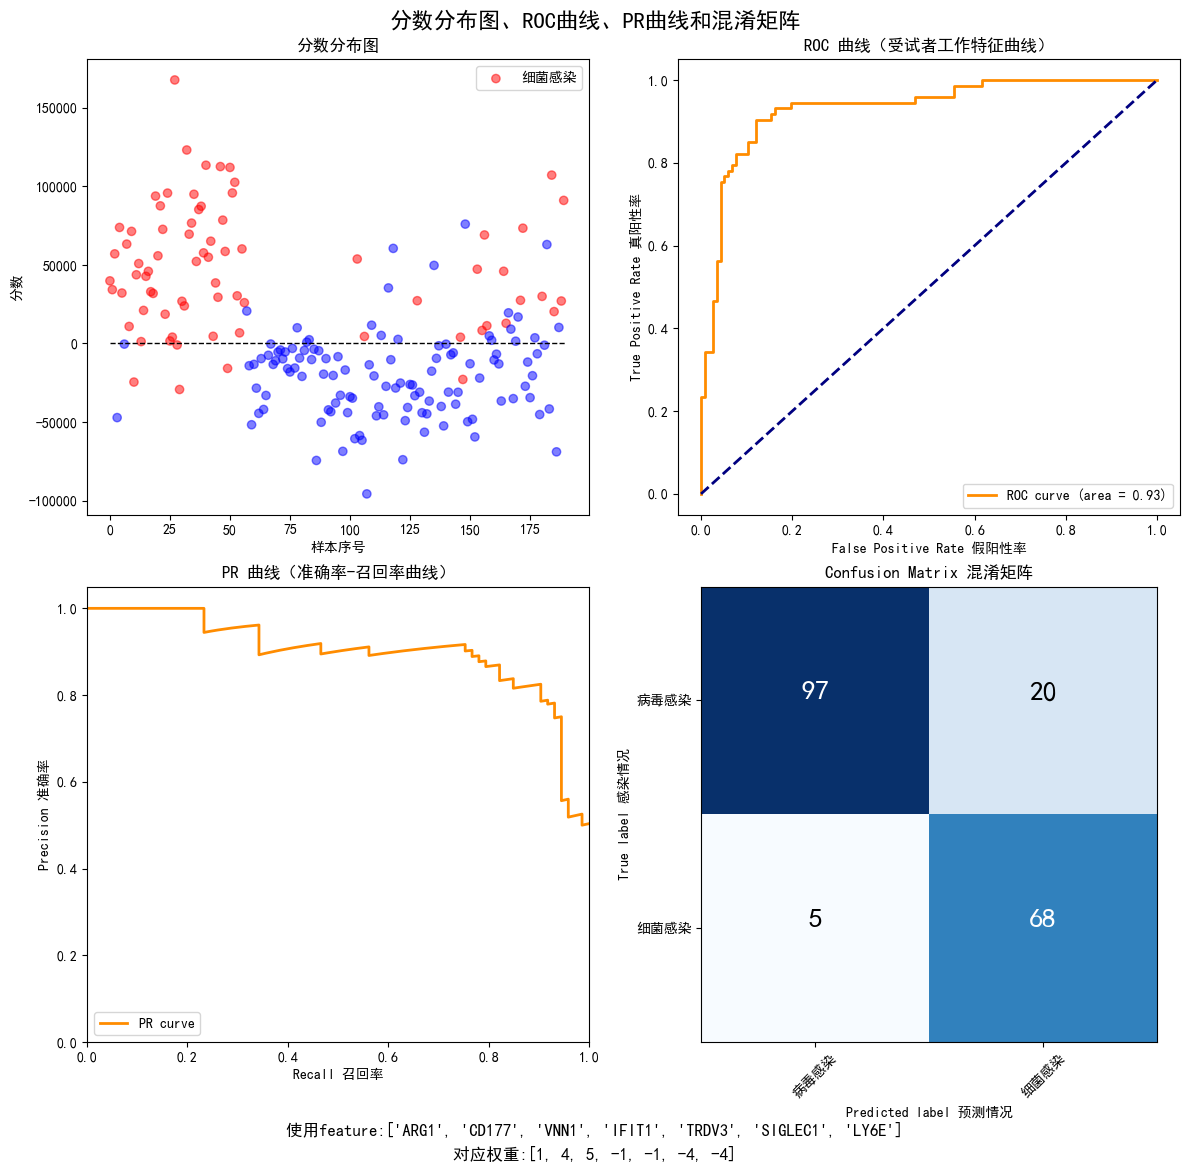

In [17]:
testfeature(Feature_theirs,Weighting_theirs,final_data)

In [18]:
y_score_theirs  = np.zeros(len(their_data))
y_pred_theirs  = np.zeros(len(their_data))
for i in range(len(their_data)):
    y_score_theirs [i] = np.dot(their_data.iloc[i],Weighting_theirs)
    if y_score_theirs [i] > 0.5:
        y_pred_theirs [i] = 1
    else:
        y_pred_theirs [i] = 0
acc_theirs = np.sum(y_pred_theirs == final_target) / len(final_target)
print("Accuracy: ", acc_theirs)

Accuracy:  0.868421052631579


### 画图

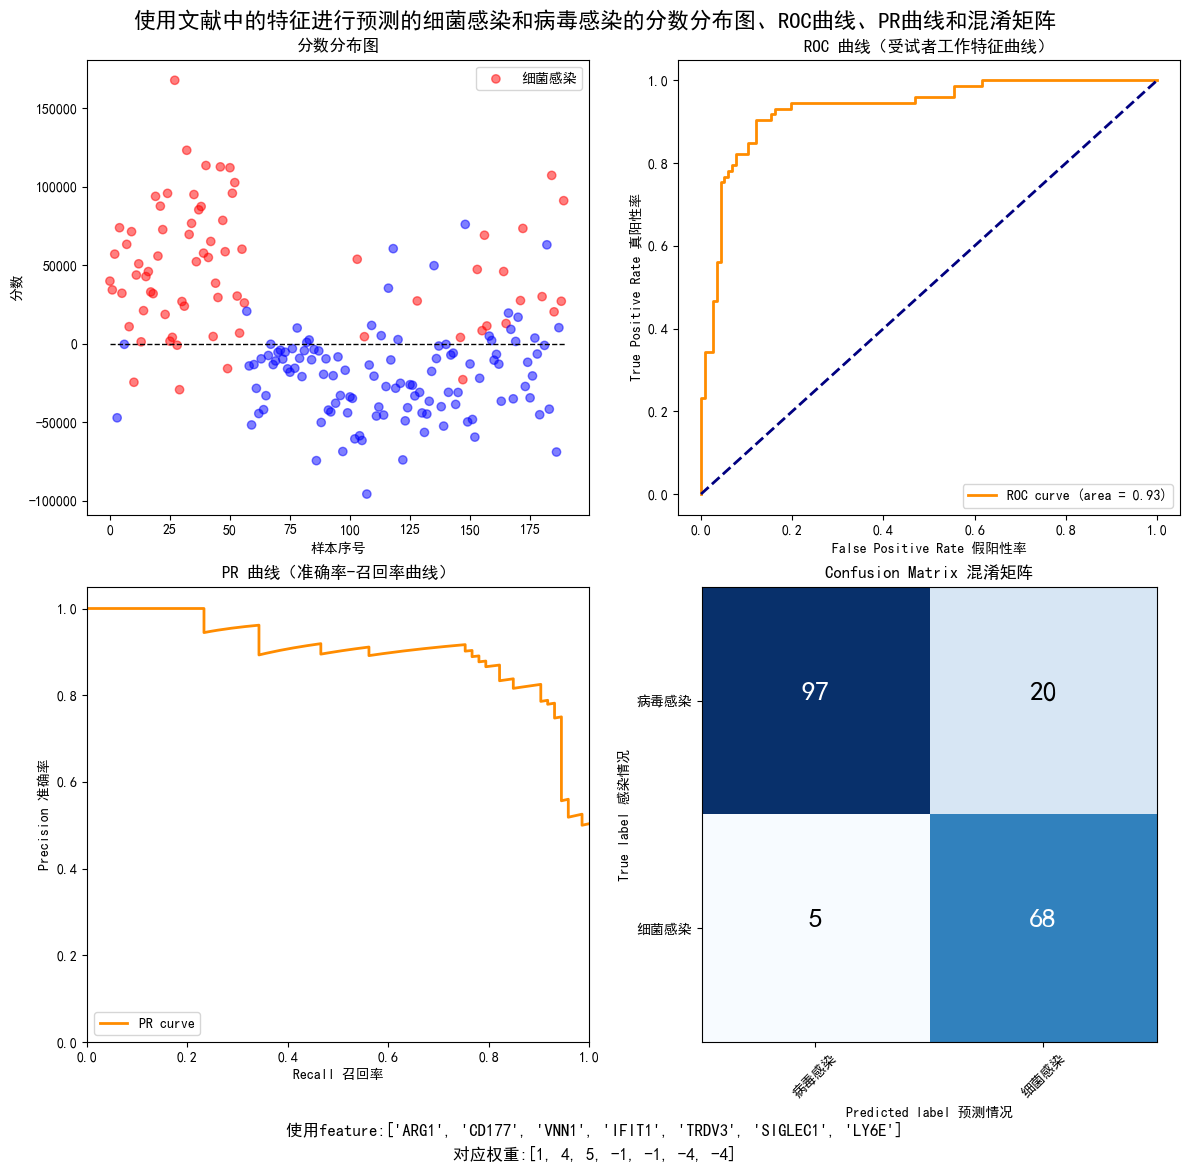

In [19]:
title = '使用文献中的特征进行预测的细菌感染和病毒感染的分数分布图、ROC曲线、PR曲线和混淆矩阵'

fig, axs = plot_all(y_score_theirs, final_target, title, Feature_theirs, Weighting_theirs)

## 第二部分 多种方法测试

In [20]:
# test different models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# xgb
# from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

### SelectKBest 选择特征

In [21]:
# 1.1. SelectKBest 来选择特征

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

# select the best 30 features
SelectKBest_chi2 = SelectKBest(chi2, k=30).fit(X_train, y_train)
SelectKBest_f_classif = SelectKBest(f_classif, k=30).fit(X_train, y_train)
# SelectKBest_mutual_info_classif = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

In [22]:
select = [SelectKBest_chi2, SelectKBest_f_classif]
select_name = ['SelectKBest_chi2', 'SelectKBest_f_classif']

In [23]:
x = 0
for i in select:
    # use svm to train the data and test the data
    i = i.fit_transform(X_train, y_train)
    svm = SVC()
    svm.fit(i, y_train)
    y_pred = svm.predict(i)
    # print("Using" + str(i) + "to train the data and test the data") str(i) is still not working. What we need is the name of the variable.
    print("Using SelectKBest to train the data and test the data")
    print("The method is: ", select_name[x])
    print("Accuracy: ", accuracy_score(y_train, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred))
    print("Classification Report: \n", classification_report(y_train, y_pred))
    x += 1

Using SelectKBest to train the data and test the data
The method is:  SelectKBest_chi2
Accuracy:  0.8881578947368421
Confusion Matrix: 
 [[83 10]
 [ 7 52]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.92      0.89      0.91        93
        True       0.84      0.88      0.86        59

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.88       152
weighted avg       0.89      0.89      0.89       152

Using SelectKBest to train the data and test the data
The method is:  SelectKBest_f_classif
Accuracy:  0.8618421052631579
Confusion Matrix: 
 [[84  9]
 [12 47]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.88      0.90      0.89        93
        True       0.84      0.80      0.82        59

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86 

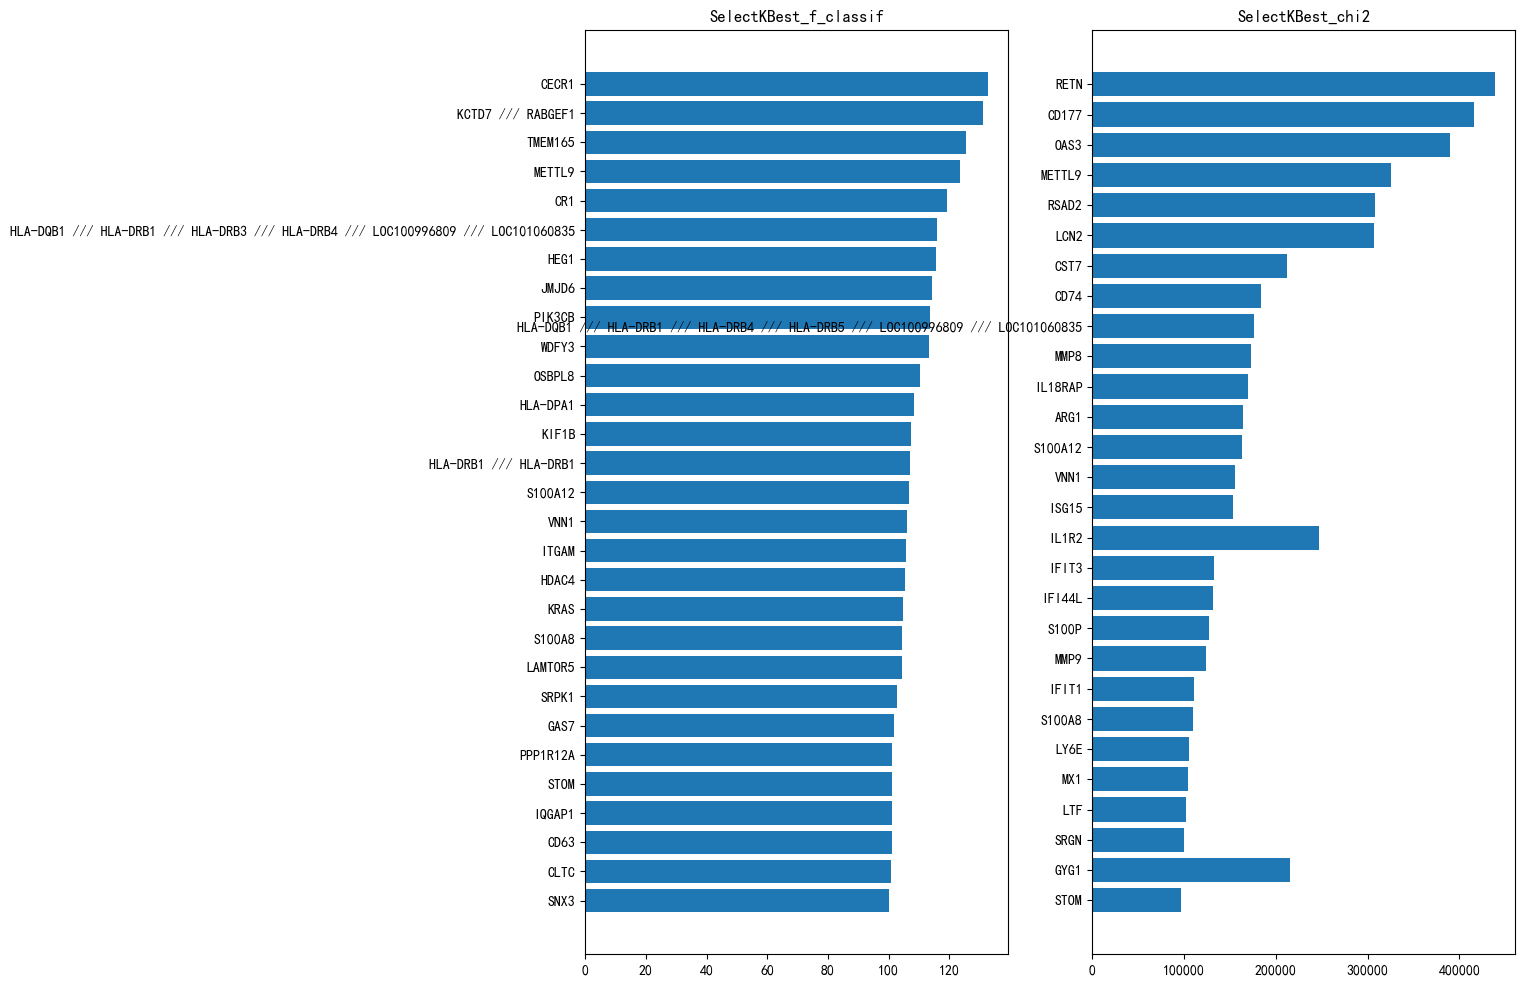

In [24]:
# draw the importance of the features selected by SelectKBest

fig, ax = plt.subplots(1, len(select), figsize=(12, 12))
for i in range(len(select)):
    ax[i-1].barh([GPL571.table[GPL571.table['ID'] == X_train.columns[i]]['Gene Symbol'].values[0] for i in select[i].get_support(indices=True)], sorted(select[i].scores_[select[i].get_support()]))
    ax[i-1].set_title(select_name[i])
plt.show()

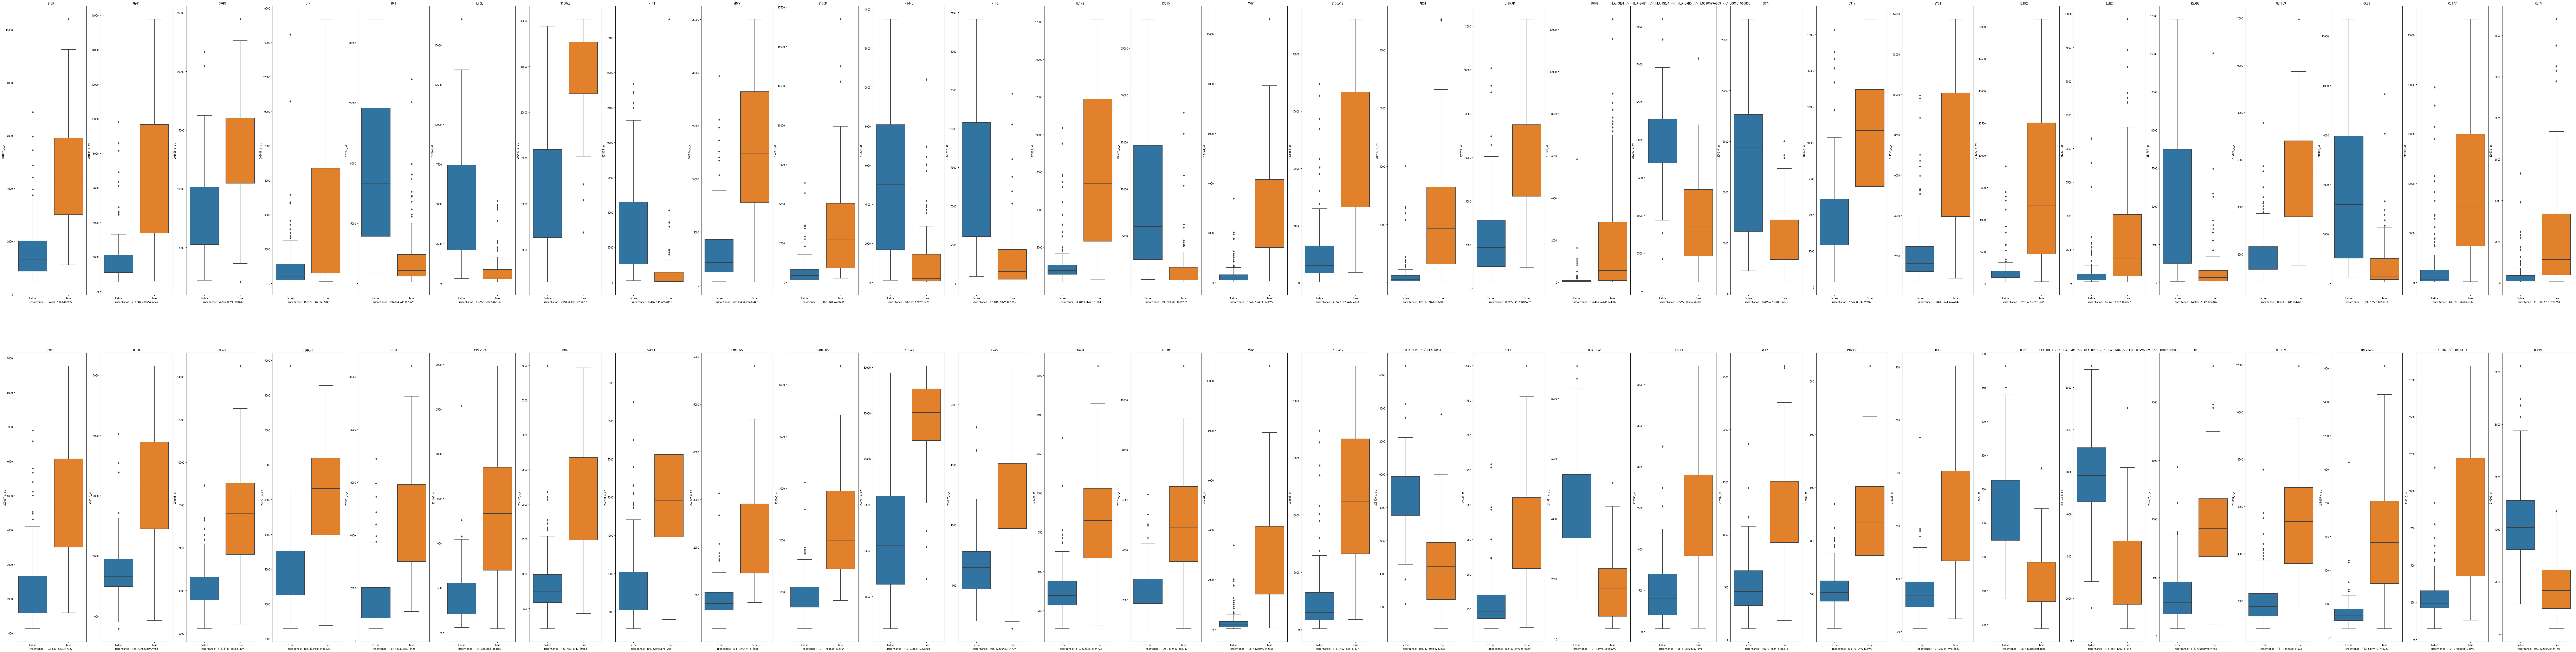

In [25]:
# for each gene selected, draw the boxplot of the expression level of the gene in the two groups
# map the values of the column 'infection_status' to 'viral' and 'bacterial'
# False: viral, True: bacterial
fig, ax = plt.subplots(len(select), 30, figsize=(160, 40))
for i in range(len(select)):
    for j in range(30):
        sns.boxplot(x='infection_status', y=X_train.columns[select[i].get_support(indices=True)[j]], data=gse_csv, ax=ax[i][j])
        ax[i][j].set_title(GPL571.table[GPL571.table['ID'] == X_train.columns[select[i].get_support(indices=True)[j]]]['Gene Symbol'].values[0])
        # also add importance of the gene
        ax[i][j].set_xlabel('importance: ' + str(select[i].scores_[select[i].get_support(indices=True)[j]]))

plt.show()


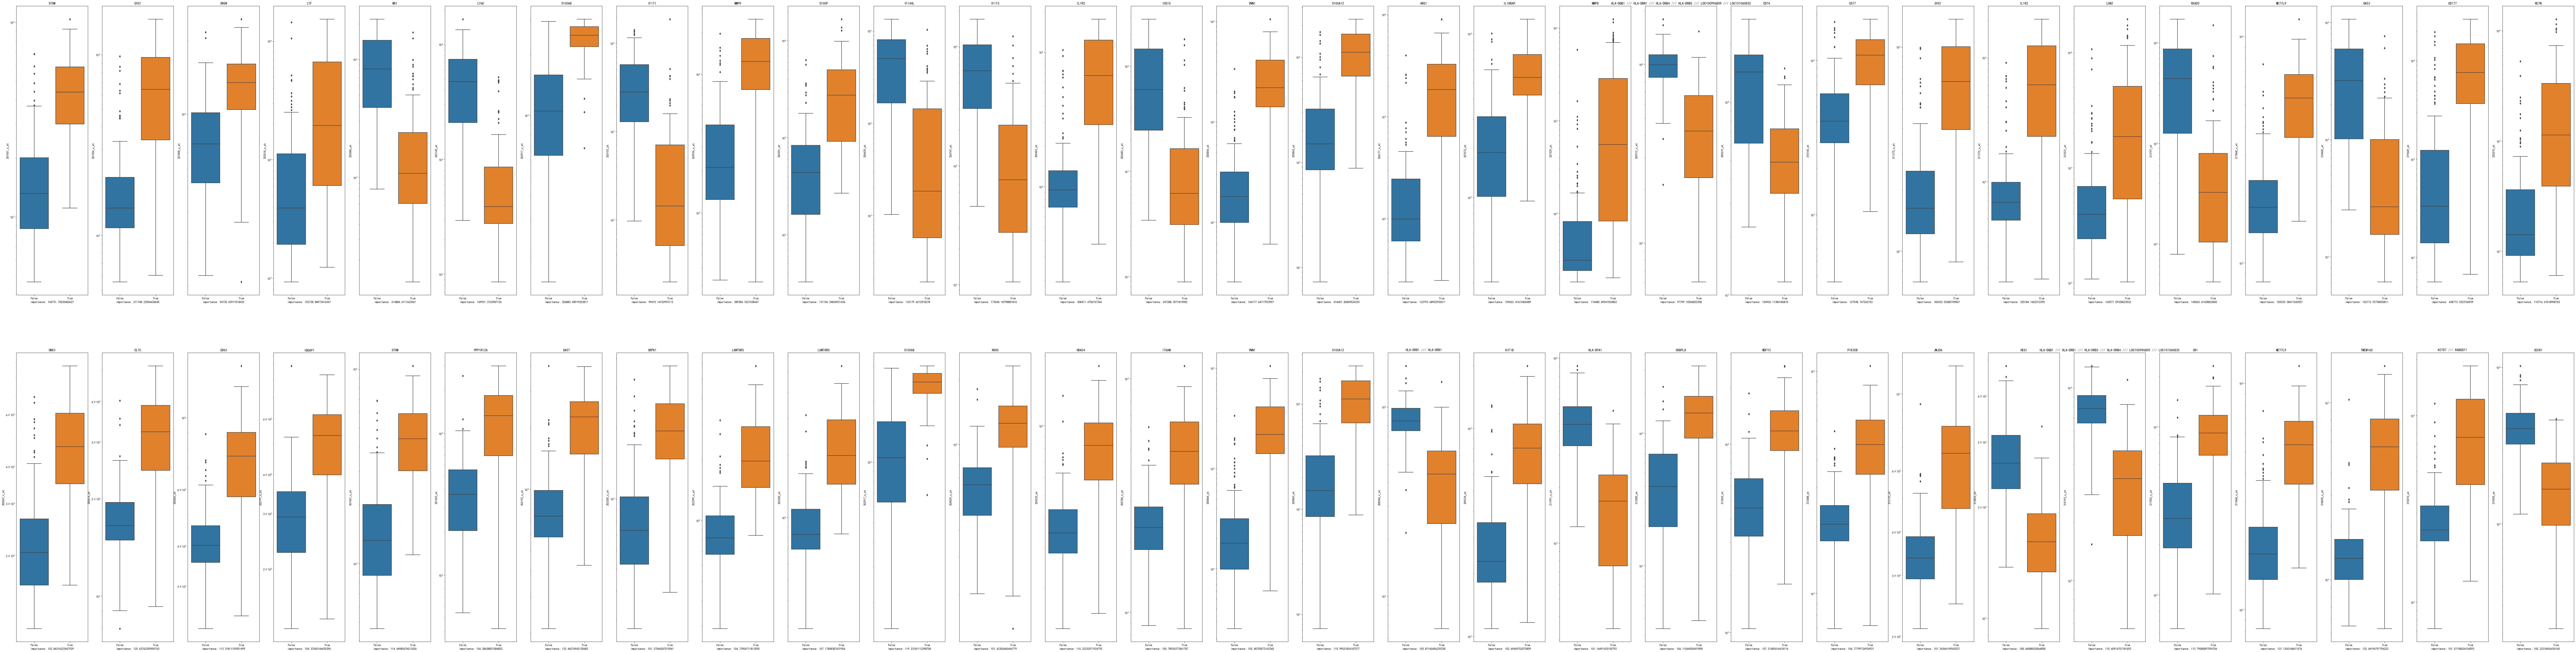

In [26]:
fig, ax = plt.subplots(len(select), 30, figsize=(160, 40))
for i in range(len(select)):
    for j in range(30):
        sns.boxplot(x='infection_status', y=X_train.columns[select[i].get_support(indices=True)[j]], data=gse_csv, ax=ax[i][j])
        ax[i][j].set_title(GPL571.table[GPL571.table['ID'] == X_train.columns[select[i].get_support(indices=True)[j]]]['Gene Symbol'].values[0])
        # also add importance of the gene
        ax[i][j].set_xlabel('importance: ' + str(select[i].scores_[select[i].get_support(indices=True)[j]]))
        #对数坐标
        ax[i][j].set_yscale('log')
plt.show()

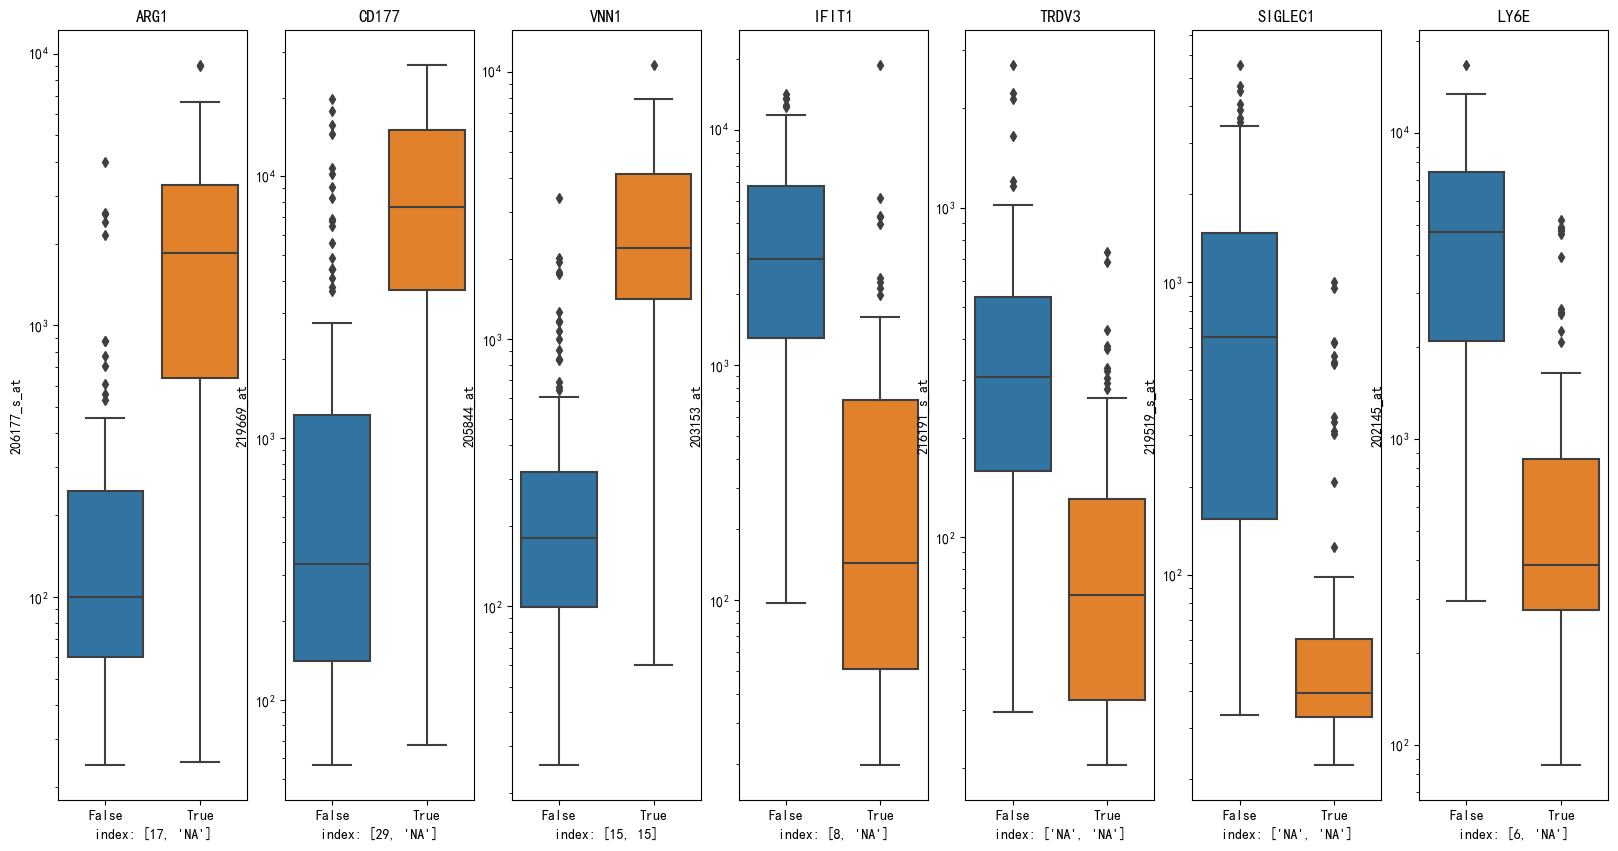

In [27]:
Gene_name_theirs = ["ARG1","CD177","VNN1","IFIT1","TRDV3","SIGLEC1","LY6E"]
Gene_id_theirs = [GPL571.table[GPL571.table['Gene Symbol'] == i]['ID'].values[0] for i in Gene_name_theirs]

fix, ax = plt.subplots(1, len(Gene_name_theirs), figsize=(20, 10))
for i in range(len(Gene_name_theirs)):
    sns.boxplot(x='infection_status', y=Gene_id_theirs[i], data=gse_csv, ax=ax[i])
    ax[i].set_title(Gene_name_theirs[i])
    # also add importance of the gene, in 3 lines, we need to find the index of the gene in the selected genes
    # then we can get the importance of the gene
    index = []
    for j in range(len(select)):
        if Gene_id_theirs[i] in X_train.columns[select[j].get_support(indices=True)]:
            # add 1 to the index, because the index starts from 0
            index.append(X_train.columns[select[j].get_support(indices=True)].tolist().index(Gene_id_theirs[i]) + 1)
        else:
            index.append('NA')
    ax[i].set_xlabel('index: ' + str(index))
    #对数坐标
    ax[i].set_yscale('log')

plt.show()


In [28]:
# use RandomForestClassifier to train the data and test the data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test = rfc.predict(X_test)
print("Using RandomForestClassifier to train the data and test the data")
print("Accuracy: ", accuracy_score(y_train, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred))
print("Classification Report: \n", classification_report(y_train, y_pred))

Using RandomForestClassifier to train the data and test the data
Accuracy:  0.8618421052631579
Confusion Matrix: 
 [[84  9]
 [12 47]]
Classification Report: 
               precision    recall  f1-score   support

       False       0.88      0.90      0.89        93
        True       0.84      0.80      0.82        59

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [29]:
# Feature Importance
# Show the IDs of the top 30 features, and then translate them into gene names, and then draw a bar chart
new_data = pd.DataFrame()

for i in rfc.feature_importances_.argsort()[-30:][::-1]: # 选出重要性最高的30个特征
    new_data[X_train.columns[i]] = X_train[X_train.columns[i]]
    genename = GPL571.table[GPL571.table['ID'] == X_train.columns[i]]['Gene Symbol'].values[0]
    if genename == '':
        genename = X_train.columns[i]
    new_data.rename(columns={X_train.columns[i]: genename}, inplace=True)

new_data.head()


,SNX13,IER3,ITGA7,HS2ST1,CAMK1,FBXO38,LAMTOR5,TMED5,TARP /// TRGC2 /// TRGV9,USP18,...,OAS2,CKAP4,LSM4,CCNT2,SLC9A6,RB1CC1,JAG1,COQ7,GAPVD1,VNN1
58,157.066200,982.441784,273.252564,26.108481,32.151768,782.659432,2410.230519,869.026851,91.512977,124.588456,...,1824.705156,4806.609683,20.499932,49.808630,441.617306,182.620267,70.165783,46.969365,254.862652,1845.812981
42,335.500421,844.854498,177.704878,77.126038,95.843861,1225.322682,4096.888546,1961.515051,161.527190,38.739899,...,239.194302,5261.568963,17.181487,281.834976,494.714305,889.164858,112.869098,72.057368,356.456534,5902.948378
128,483.730079,533.544774,61.721720,57.327967,95.895660,1442.329330,3111.490379,1525.755684,247.496663,33.139506,...,221.350097,3962.497583,16.215590,378.260859,472.948572,1229.556598,125.332405,79.689105,368.580900,3374.305777
67,145.153103,358.321159,34.218034,29.288153,414.941596,541.249682,669.404640,343.363592,986.277484,674.840215,...,5409.498138,1231.027308,36.355725,94.122555,170.894607,148.505899,42.857534,43.368156,331.246429,193.244010
210,53.555659,335.046814,66.815455,18.395246,284.635584,186.412719,496.308183,32.649788,718.146507,143.412619,...,839.487249,776.774856,46.935311,35.541297,77.408509,62.395387,28.426348,35.712935,161.340554,143.310508


test different models

In [30]:
# Use linear regression to train the data and test the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("train_acc: ", lr.score(X_train, y_train))
print("test_acc: ", lr.score(X_test, y_test))

train_acc:  1.0
test_acc:  0.7544727852912555


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
for i in range(len(select)):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    lr.fit(X_train.iloc[:, select[i].get_support(indices=True)], y_train)
    y_pred = lr.predict(X_test.iloc[:, select[i].get_support(indices=True)])
    print("Using " + str(select[i].get_support(indices=True).shape[0]) + " features selected by " + str(select_name[i]))
    print("train_acc: ", lr.score(X_train.iloc[:, select[i].get_support(indices=True)], y_train))
    print("test_acc: ", lr.score(X_test.iloc[:, select[i].get_support(indices=True)], y_test))

Using 30 features selected by SelectKBest_chi2
train_acc:  0.6452984427492228
test_acc:  0.5751537562765733
Using 30 features selected by SelectKBest_f_classif
train_acc:  0.7048046368694909
test_acc:  0.669010449983711


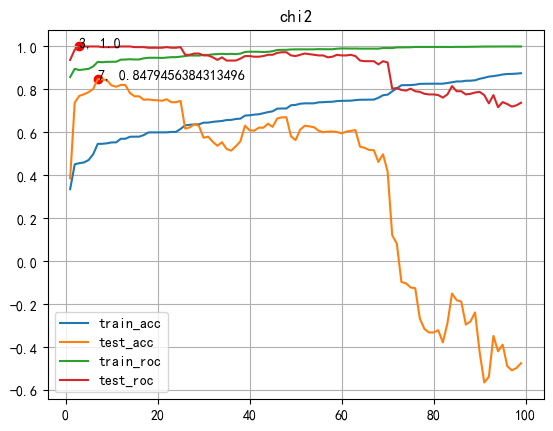

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train_acc = []
test_acc = []
train_roc = []
test_roc = []
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    # reselect the features
    reselect = SelectKBest(score_func=chi2, k=i)
    reselect.fit(X_train, y_train)
    lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train) # use the selected features to train the data
    y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
    train_acc.append(lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
    test_acc.append(lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))
    train_roc.append(roc_auc_score(y_train, lr.predict(X_train.iloc[:, reselect.get_support(indices=True)])))
    test_roc.append(roc_auc_score(y_test, lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])))
# draw a line chart
plt.plot(range(1, 100), train_acc, label='train_acc')
plt.plot(range(1, 100), test_acc, label='test_acc')
plt.plot(range(1, 100), train_roc, label='train_roc')
plt.plot(range(1, 100), test_roc, label='test_roc')
plt.title('chi2')
plt.legend()
# grid
plt.grid()
# mark the maximum value
plt.scatter(test_acc.index(max(test_acc)) + 1, max(test_acc), marker='o', color='r')
plt.text(test_acc.index(max(test_acc)) + 1, max(test_acc), str(test_acc.index(max(test_acc)) + 1) + ', ' + str(max(test_acc)))
plt.scatter(test_roc.index(max(test_roc)) + 1, max(test_roc), marker='o', color='r')
plt.text(test_roc.index(max(test_roc)) + 1, max(test_roc), str(test_roc.index(max(test_roc)) + 1) + ', ' + str(max(test_roc)))
plt.show()



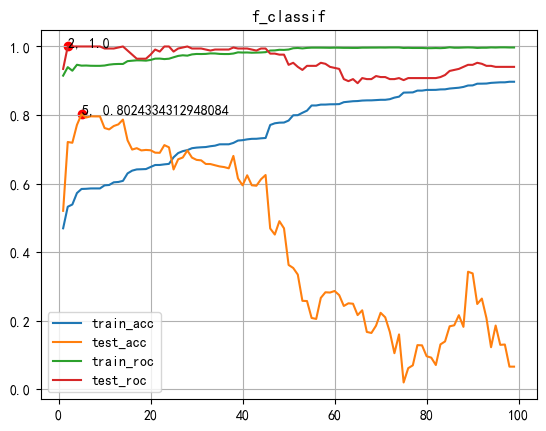

In [36]:
train_acc = []
test_acc = []
train_roc = []
test_roc = []
for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    # reselect the features
    reselect = SelectKBest(score_func=f_classif, k=i)
    reselect.fit(X_train, y_train)
    lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
    y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
    train_acc.append(lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
    test_acc.append(lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))
    train_roc.append(roc_auc_score(y_train, lr.predict(X_train.iloc[:, reselect.get_support(indices=True)])))
    test_roc.append(roc_auc_score(y_test, lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])))
plt.plot(range(1, 100), train_acc, label='train_acc')
plt.plot(range(1, 100), test_acc, label='test_acc')
plt.plot(range(1, 100), train_roc, label='train_roc')
plt.plot(range(1, 100), test_roc, label='test_roc')
plt.title('f_classif')
plt.legend()
# grid
plt.grid()
# mark the maximum value
plt.scatter(test_acc.index(max(test_acc)) + 1, max(test_acc), marker='o', color='r')
plt.text(test_acc.index(max(test_acc)) + 1, max(test_acc), str(test_acc.index(max(test_acc)) + 1) + ', ' + str(max(test_acc)))
# mark the maximum value
plt.scatter(test_roc.index(max(test_roc)) + 1, max(test_roc), marker='o', color='r')
plt.text(test_roc.index(max(test_roc)) + 1, max(test_roc), str(test_roc.index(max(test_roc)) + 1) + ', ' + str(max(test_roc)))
plt.show()

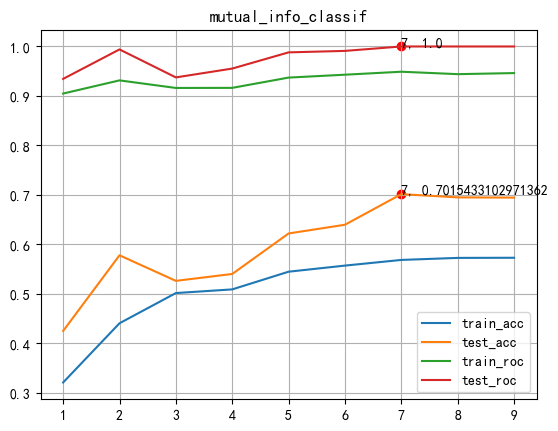

In [37]:
train_acc = []
test_acc = []
train_roc = []
test_roc = []
for i in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
    # reselect the features
    reselect = SelectKBest(score_func=mutual_info_classif, k=i)
    reselect.fit(X_train, y_train)
    lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
    y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
    train_acc.append(lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
    test_acc.append(lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))
    train_roc.append(roc_auc_score(y_train, lr.predict(X_train.iloc[:, reselect.get_support(indices=True)])))
    test_roc.append(roc_auc_score(y_test, lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])))
# draw a line chart
plt.plot(range(1, 10), train_acc, label='train_acc')
plt.plot(range(1, 10), test_acc, label='test_acc')
plt.plot(range(1, 10), train_roc, label='train_roc')
plt.plot(range(1, 10), test_roc, label='test_roc')
plt.title('mutual_info_classif')
plt.legend()
# grid
plt.grid()
# mark the maximum value
plt.scatter(test_acc.index(max(test_acc)) + 1, max(test_acc), marker='o', color='r')
plt.text(test_acc.index(max(test_acc)) + 1, max(test_acc), str(test_acc.index(max(test_acc)) + 1) + ', ' + str(max(test_acc)))
plt.scatter(test_roc.index(max(test_roc)) + 1, max(test_roc), marker='o', color='r')
plt.text(test_roc.index(max(test_roc)) + 1, max(test_roc), str(test_roc.index(max(test_roc)) + 1) + ', ' + str(max(test_roc)))
plt.show()

In [38]:
# so, use f_classif and 5 features to train the data and test the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
# reselect the features
reselect = SelectKBest(score_func=chi2, k=7)
reselect.fit(X_train, y_train)
lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
print("train_acc: ", lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
print("test_acc: ", lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

train_acc:  0.5465545230489399
test_acc:  0.8479456384313496


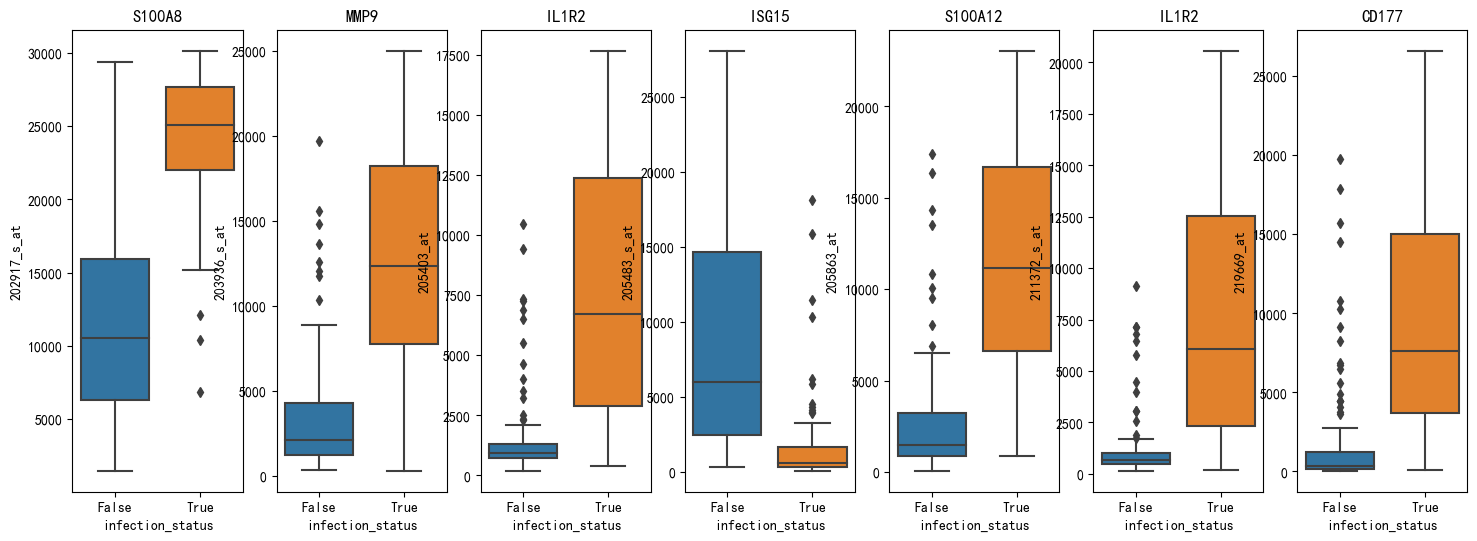

In [39]:
fig, ax = plt.subplots(1, 7, figsize=(18, 6))
for i in range(7):
    sns.boxplot(x='infection_status', y=X_train.columns[reselect.get_support(indices=True)][i], data=gse_csv, ax=ax[i])
    ax[i].set_title(GPL571.table[GPL571.table['ID'] == X_train.columns[reselect.get_support(indices=True)][i]]['Gene Symbol'].values[0])
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(
    fit_intercept=False,
    normalize=False,
    copy_X=False)
# Limit the coefficients between +-1:
X_train, X_test, y_train, y_test = train_test_split(final_data, final_target, test_size=0.2, random_state=42)
# reselect the features
reselect = SelectKBest(score_func=chi2, k=7)
reselect.fit(X_train, y_train)
lr.fit(X_train.iloc[:, reselect.get_support(indices=True)], y_train)
y_pred = lr.predict(X_test.iloc[:, reselect.get_support(indices=True)])
print("train_acc: ", lr.score(X_train.iloc[:, reselect.get_support(indices=True)], y_train))
print("test_acc: ", lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test))

# from the lr we get the coefficients
print(lr.coef_)
# get the gene symbol
gene_symbol = [GPL571.table[GPL571.table['ID'] == X_train.columns[reselect.get_support(indices=True)][i]]['Gene Symbol'].values[0] for i in range(len(lr.coef_))]
print(gene_symbol)

train_acc:  0.5464547870834411
test_acc:  0.8494932912507694
[ 2.26395162e-05 -3.98801409e-06  4.01706178e-05 -1.75073451e-05
  6.21588650e-06 -1.66321758e-05  2.12014960e-06]
['S100A8', 'MMP9', 'IL1R2', 'ISG15', 'S100A12', 'IL1R2', 'CD177']


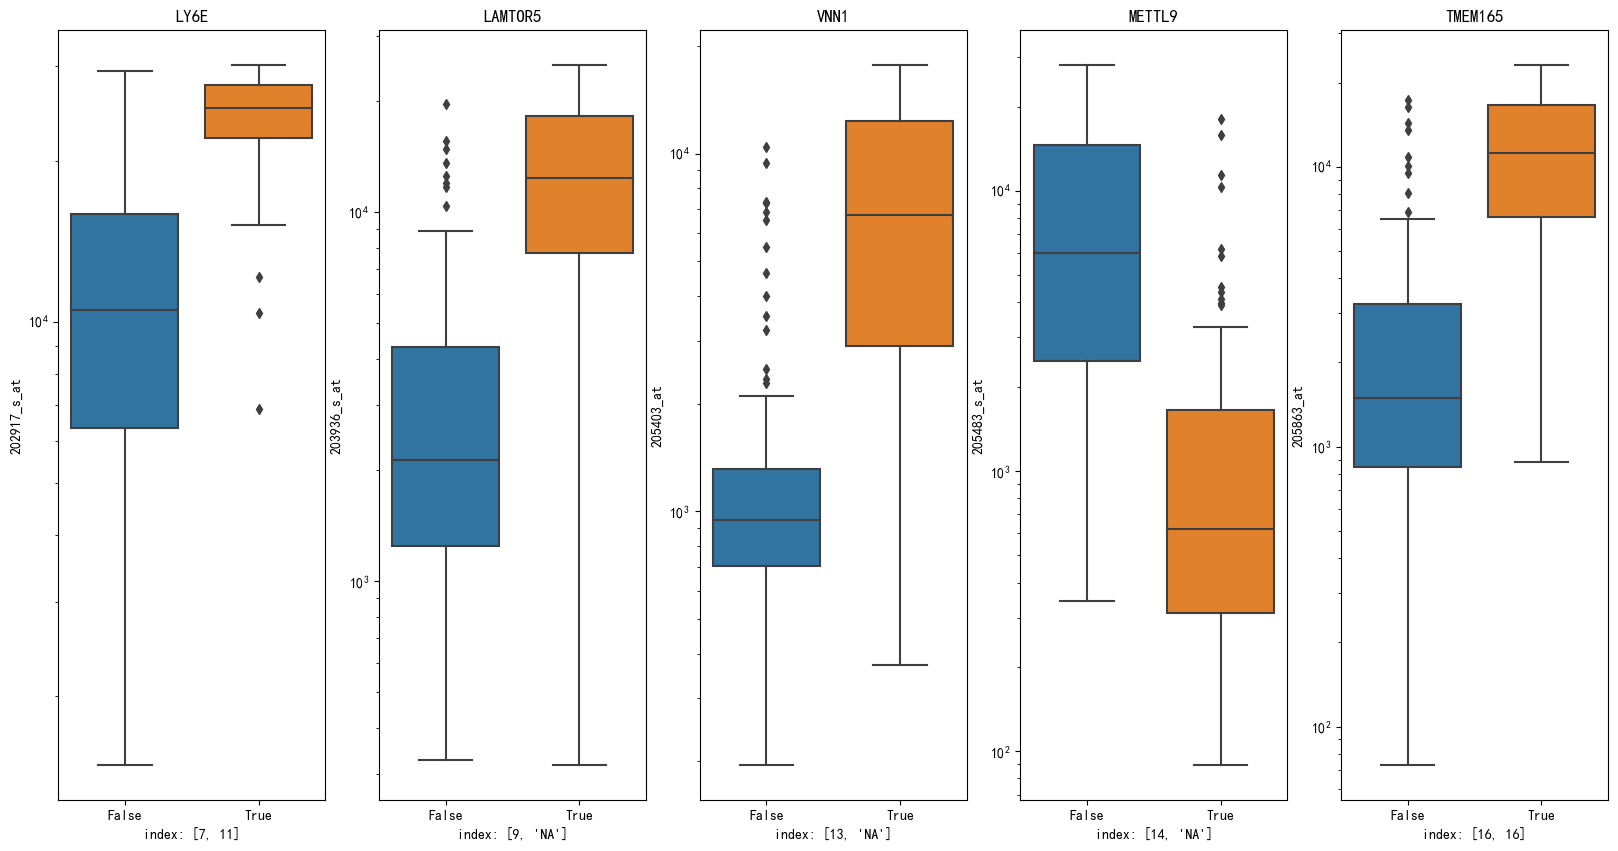

In [41]:
Gene_name_ours = ['LY6E', 'LAMTOR5', 'VNN1', 'METTL9', 'TMEM165']
Gene_id_ours = X_train.columns[reselect.get_support(indices=True)].tolist()

fix, ax = plt.subplots(1, len(Gene_name_ours), figsize=(20, 10))
for i in range(len(Gene_name_ours)):
    sns.boxplot(x='infection_status', y=Gene_id_ours[i], data=gse_csv, ax=ax[i])
    ax[i].set_title(Gene_name_ours[i])
    # also add importance of the gene, in 3 lines, we need to find the index of the gene in the selected genes
    # then we can get the importance of the gene
    index = []
    for j in range(len(select)):
        if Gene_id_ours[i] in X_train.columns[select[j].get_support(indices=True)]:
            # add 1 to the index, because the index starts from 0
            index.append(X_train.columns[select[j].get_support(indices=True)].tolist().index(Gene_id_ours[i]) + 1)
        else:
            index.append('NA')
    ax[i].set_xlabel('index: ' + str(index))
    #对数坐标
    ax[i].set_yscale('log')
plt.show()

0 [ 0. -0.  0. -0.  0. -0.  0.] 0.631578947368421
1 [ 0. -0.  0. -0.  0. -0.  0.] 0.631578947368421
2 [ 0. -0.  1. -0.  0. -0.  0.] 0.8157894736842105
3 [ 1. -0.  1. -1.  0. -0.  0.] 0.9736842105263158
4 [ 1. -0.  2. -1.  0. -1.  0.] 0.9736842105263158
5 [ 1. -0.  2. -1.  0. -1.  0.] 0.9736842105263158
6 [ 1. -0.  2. -1.  0. -1.  0.] 0.9736842105263158
7 [ 2. -0.  3. -1.  0. -1.  0.] 0.9736842105263158
8 [ 2. -0.  3. -1.  0. -1.  0.] 0.9736842105263158
9 [ 2. -0.  4. -2.  1. -1.  0.] 0.9736842105263158
10 [ 2. -0.  4. -2.  1. -2.  0.] 0.9736842105263158
11 [ 2. -0.  4. -2.  1. -2.  0.] 1.0
12 [ 3. -0.  5. -2.  1. -2.  0.] 0.9736842105263158
13 [ 3. -1.  5. -2.  1. -2.  0.] 0.9736842105263158
14 [ 3. -1.  6. -2.  1. -2.  0.] 0.9473684210526315
15 [ 3. -1.  6. -3.  1. -2.  0.] 0.9736842105263158
16 [ 4. -1.  6. -3.  1. -3.  0.] 0.9736842105263158
17 [ 4. -1.  7. -3.  1. -3.  0.] 0.9736842105263158
18 [ 4. -1.  7. -3.  1. -3.  0.] 0.9736842105263158
19 [ 4. -1.  8. -3.  1. -3.  0.] 0.9473

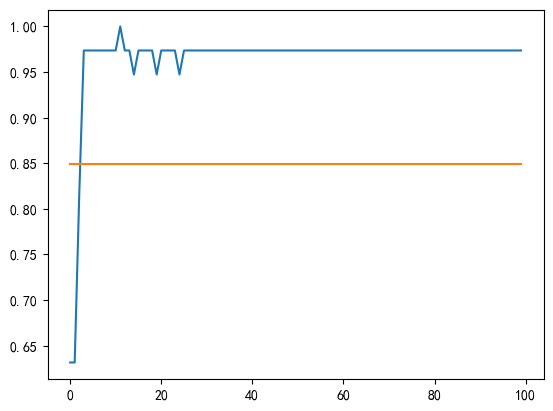

In [42]:
# draw a line chart
test_acc = []
coefs = []
for times in range(0, 100):
    coef = np.round(times*lr.coef_*10000, 0)
    coefs.append(coef)
    y_pred01 = np.zeros(len(y_test))
    for i in range(len(y_pred)):
        y_pred[i] = 0
        for j in range(5):
            y_pred[i] += X_test.iloc[:, reselect.get_support(indices=True)].values[i][j] * coef[j]
        if y_pred[i] > 0.5*10000*times:
            y_pred01[i] = 1
        else:
            y_pred01[i] = 0
    test_acc.append(np.sum(y_pred01 == y_test.values) / len(y_pred01))
    print(times, coef, test_acc[times]) 

plt.plot(range(100), test_acc, label='test_acc')
# draw a line of lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test)
plt.plot(range(100), [lr.score(X_test.iloc[:, reselect.get_support(indices=True)], y_test)]*100, label='lr.score')

Accuracy:  0.8947368421052632


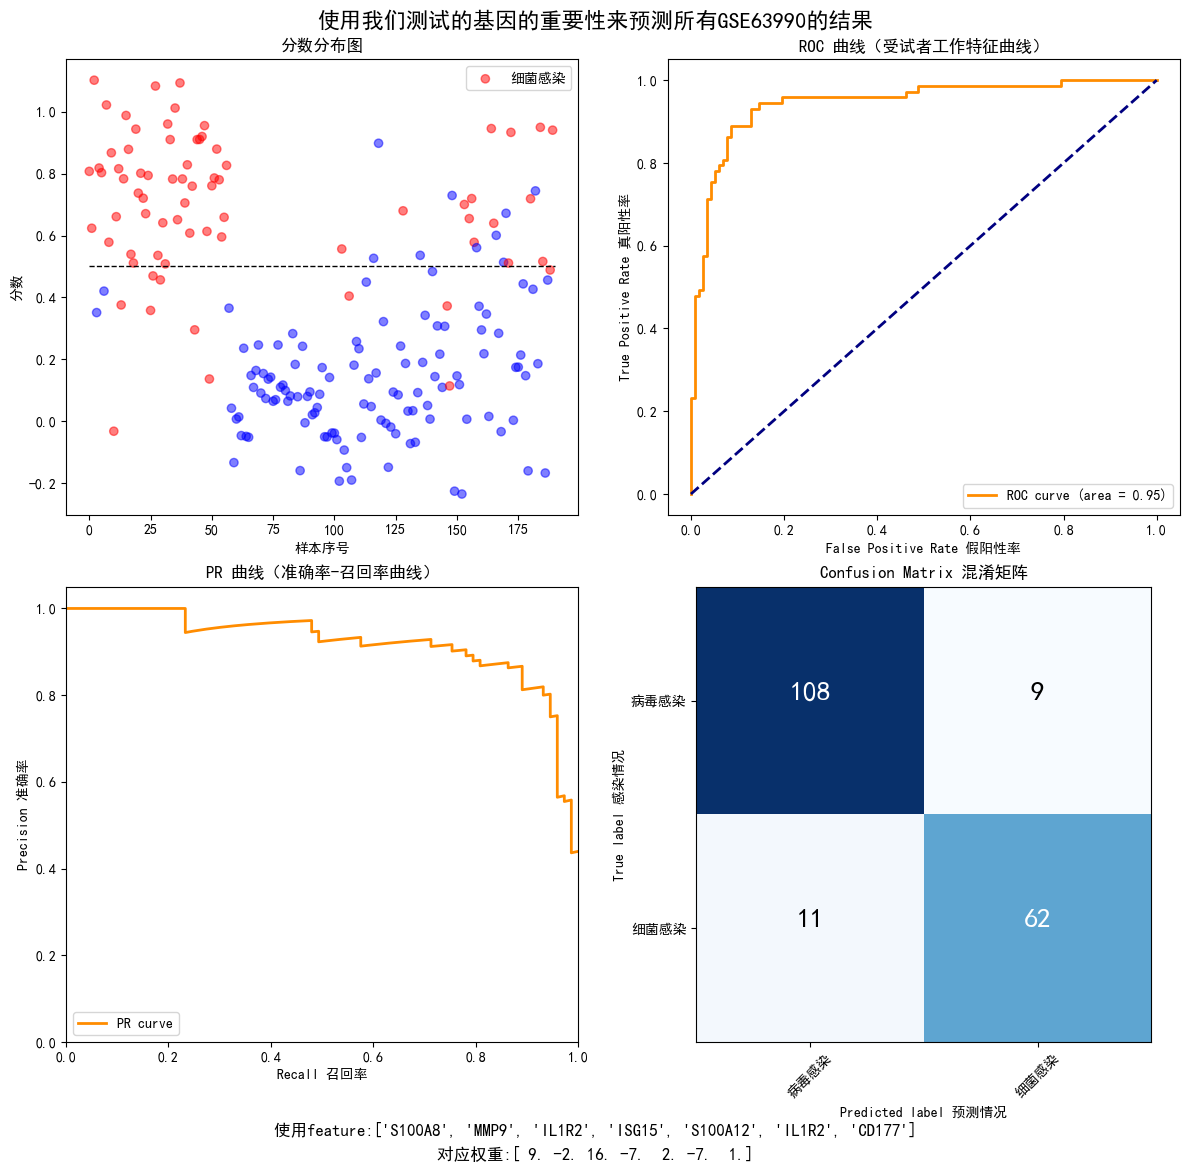

In [43]:
times = 40
testfeaturewithtimes(gene_symbol, np.round(times*lr.coef_*10000, 0), gse_csv, title="使用我们测试的基因的重要性来预测所有GSE63990的结果", times=times*10000)

### 用其他数据集测试

Accuracy:  0.7912087912087912


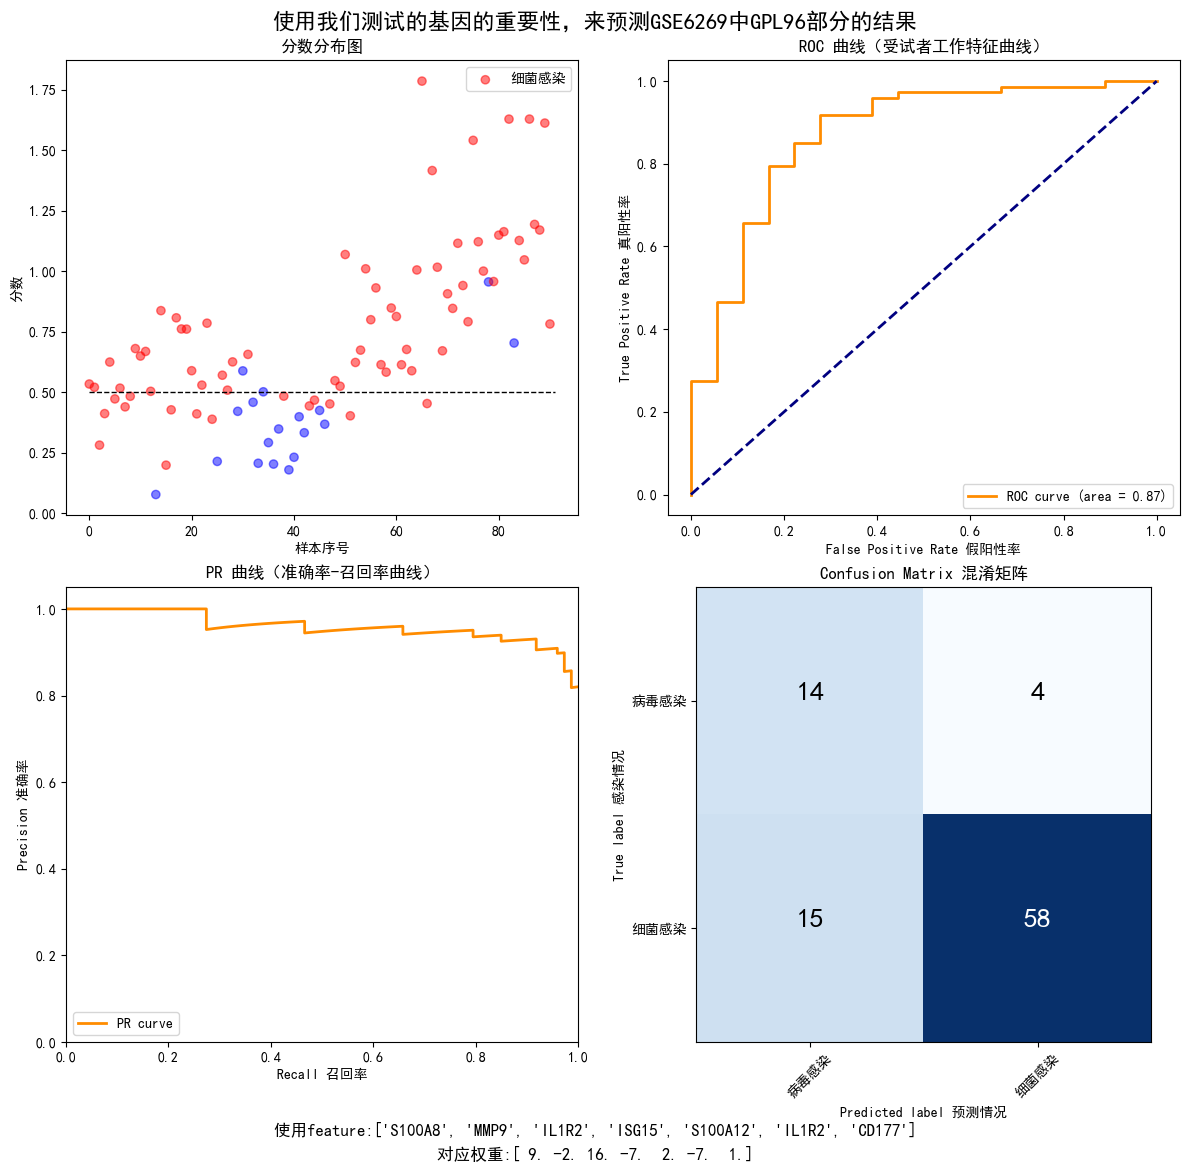

In [44]:
# import the data GSE6269
test_data = pd.read_csv('./datasets/' + 'GSE6269' + '.csv')
test_data = test_data.dropna(subset=['infection_status'])
test_data = test_data[test_data['infection_status'] != 'None']
test_data['infection_status'] = test_data['infection_status'].map(
    {'S. aureus, MRSA': 1,'Influenza A': 0, 'E. coli': 1, 'S. pneumoniae': 1, 'S. aureus, MSSA': 1, 'Influenza B': 0})

test_data.head()

testfeaturewithtimes(gene_symbol, np.round(times*lr.coef_*10000, 0), test_data, title="使用我们测试的基因的重要性，来预测GSE6269中GPL96部分的结果", times=times*10000)


Accuracy:  0.4725274725274725


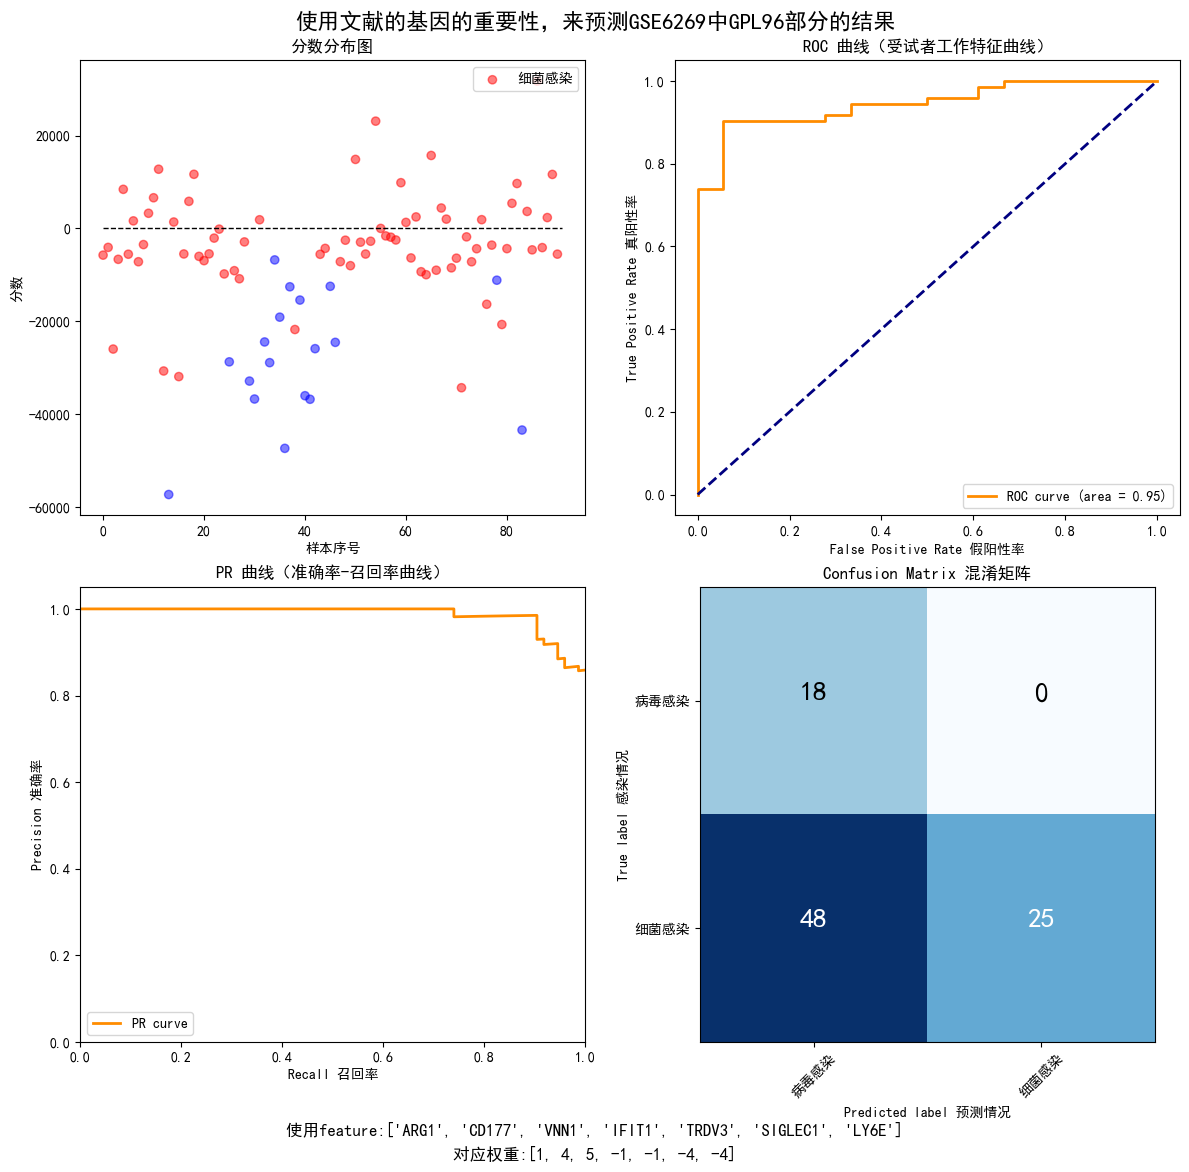

In [61]:
testfeaturewithtimes(Feature_theirs,Weighting_theirs, test_data, title="使用文献的基因的重要性，来预测GSE6269中GPL96部分的结果", times=1)

In [46]:
X_test_new = test_data_new[Gene_id_ours]
y_test_new = test_data_new['infection_status']

# use the model we trained before
y_pred_new = lr.predict(X_test_new)
y_pred01_new = np.zeros(len(y_pred_new))
sns.boxplot(x='infection_status', y=y_pred_new, data=test_data_new)
wrong = []
for i in range(len(y_pred)):
    if y_pred_new[i] > -500:
        y_pred01_new[i] = 1
    else:
        y_pred01_new[i] = -1
    if y_pred01_new[i] != y_test_new.values[i]:
        wrong.append(i)
print("test_acc: ", 1 - len(wrong) / len(y_pred01_new))

NameError: name 'test_data_new' is not defined

In [ ]:
X_test_new = test_data_new[Gene_id_ours]
y_test_new = test_data_new['infection_status']
# use the model to predict the data
test_acc_new = []
coefs = []
for times in range(0, 100):
    coef = np.round(times*lr.coef_*10000, 0)
    y_pred_new = np.zeros(len(y_test_new))
    y_pred01_new = np.zeros(len(y_test_new))
    wrong = []
    for i in range(len(y_test_new)):
        y_pred_new[i] = 0
        for j in range(5):
            y_pred_new[i] += X_test_new.values[i][j] * coef[j]
        if y_pred_new[i] > -1000 * times:
            y_pred01_new[i] = 1
        else:
            y_pred01_new[i] = -1
        if y_pred01_new[i] != y_test_new.values[i]:
            wrong.append(i)
    test_acc_new.append(1 - len(wrong) / len(y_test_new))
    print(times, coef, (1 - len(wrong) / len(y_test_new)))

plt.plot(range(100), test_acc_new, label='test_acc')

In [ ]:
# draw the two line charts together
plt.plot(range(100), test_acc, label='test_acc')
plt.plot(range(100), test_acc_new, label='test_acc_new')
plt.legend()

剩下的

In [ ]:
# test different models

logreg = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
# xgb = XGBClassifier()

models = [logreg, svc, rfc, knn, dtc, gnb]
# models = [logreg, svc, rfc, knn, dtc, gnb, xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    print('Classification Report: ', classification_report(y_test, y_pred))
    print('Cross Validation Score: ', cross_val_score(model, final_data, final_target, cv=5).mean())
    print('')

In [ ]:
rfc = RandomForestClassifier( n_estimators=7, max_depth=1, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
print('Cross Validation Score: ', cross_val_score(rfc, final_data, final_target, cv=5).mean())

In [ ]:
# New a dataframe
# only keep the top 20 features
# and the column 'infection_status'
new_data = pd.DataFrame()
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns)

for i in range(7):
    new_data[feature_importance.sort_values(ascending=False).index[i]] = final_data[feature_importance.sort_values(ascending=False).index[i]]
    new_data.rename(columns={feature_importance.sort_values(ascending=False).index[i]: GPL571.table[GPL571.table['ID'] == feature_importance.sort_values(ascending=False).index[i]]['Gene Symbol'].values[0]}, inplace=True)
new_data['infection_status'] = final_target
new_data.head()

In [ ]:
# draw the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Draw the importance of each feature with top 20 features with the help of RandomForestClassifier
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns)

# the top 20 features should be translated to the gene names
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance = feature_importance[:7]
for i in range(len(feature_importance)):
    Gene_Symbol = GPL571.table[GPL571.table['ID'] == feature_importance.index[i]]['Gene Symbol']
    if Gene_Symbol.empty:
        Gene_Symbol[0] = feature_importance.index[i]
    feature_importance.rename(index={feature_importance.index[i]: Gene_Symbol.values[0]}, inplace=True)
feature_importance.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance')

plt.show()

In [ ]:
# New a dataframe
# only keep the top 20 features
# and the column 'infection_status'
new_data = pd.DataFrame()
for i in range(len(feature_importance)):
    new_data[feature_importance.index[i]] = gse_csv[feature_importance.index[i]]
new_data['infection_status'] = gse_csv['infection_status']
new_data.head()